## Problem Statement


You are a data scientist at a management consulting firm specializing in workplace efficiency and employee productivity. You have been provided with a dataset named **"employees_work_hours_data.csv"**, containing detailed records of employees’ work hours and related attributes in a corporate setting. The dataset includes the following columns:

- **employee_id:** A unique identifier for each employee.
- **department:** The department where the employee works (e.g., Sales, IT, HR).
- **remote_working:** Indicates whether the employee is working remotely (Yes/No).
- **hours_worked_per_day:** The average number of hours the employee works per day.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Task1: Importing and Examining the Dataset

1. Import the data from the "employees_work_hours_data.csv" file.
2. display the number of rows and columns. 
3. Display the first few rows of the dataset to get an overview.


In [2]:
df =pd.read_csv('employees_work_hours_data.csv')
df.head()

,employee_id,department,remote_working,hours_worked_per_day
0,E0001,HR,No,10.1
1,E0002,HR,No,8.5
2,E0003,IT,Yes,9.2
3,E0004,Marketing,No,10.7
4,E0005,Marketing,Yes,10.2


In [3]:
df.shape

(2800, 4)

### Task2: Statistical Measures of Work Hours

Compute fundamental statistical measures for the 'hours_worked_per_day' column.
- **Calculate the Mean**: Average number of hours worked per day by the employees.
- **Compute the Standard Deviation**: The amount of variation or dispersion in the daily work hours.

In [6]:
mean= round(df.hours_worked_per_day.mean(),2)
std= round(df.hours_worked_per_day.std(),2)
mean,std

(7.98, 1.34)

### Task3: Calculating Z-Scores for Outlier Detection

- **Compute Z-Scores:** For each entry in the 'hours_worked_per_day' column, calculate its Z-score. The Z-score represents how many standard deviations a value is from the mean, which is crucial for identifying outliers.

In [7]:
df['z-score']= (df.hours_worked_per_day - mean)/std

In [8]:
df.head()

,employee_id,department,remote_working,hours_worked_per_day,z-score
0,E0001,HR,No,10.1,1.582090
1,E0002,HR,No,8.5,0.388060
2,E0003,IT,Yes,9.2,0.910448
3,E0004,Marketing,No,10.7,2.029851
4,E0005,Marketing,Yes,10.2,1.656716


### Task4: Removing Outliers Based on Z-Scores

- Identify and exclude rows where the 'hours_worked_per_day' Z-score is less than -3 or greater than +3, thus removing outliers from the dataset.

In [9]:
df[(df['z-score']<-3 ) | (df['z-score'] > 3)]

,employee_id,department,remote_working,hours_worked_per_day,z-score
153,E0154,Sales,No,13.8,4.343284
220,E0221,IT,Yes,14.6,4.940299
251,E0252,HR,No,1.6,-4.761194
288,E0289,Sales,No,15.7,5.761194
496,E0497,Marketing,Yes,1.2,-5.059701
630,E0631,Sales,No,2.4,-4.164179
712,E0713,HR,No,17.9,7.402985
757,E0758,Marketing,Yes,14.1,4.567164
806,E0807,Marketing,Yes,14.6,4.940299
881,E0882,Sales,No,2.6,-4.014925


In [11]:
df_no_outliers = df[(df['z-score']>-3 ) & (df['z-score'] < 3)]
df_no_outliers

,employee_id,department,remote_working,hours_worked_per_day,z-score
0,E0001,HR,No,10.1,1.582090
1,E0002,HR,No,8.5,0.388060
2,E0003,IT,Yes,9.2,0.910448
3,E0004,Marketing,No,10.7,2.029851
4,E0005,Marketing,Yes,10.2,1.656716
...,...,...,...,...,...
2795,E2796,Marketing,No,7.6,-0.283582
2796,E2797,HR,No,6.9,-0.805970
2797,E2798,Sales,Yes,8.4,0.313433
2798,E2799,IT,Yes,6.3,-1.253731


### Task5: Standard Normal Distribution Post-Outlier Removal

-  Construct a visual plot of the Standard Normal Distribution using the Z-scores from the 'hours_worked_per_day' data, ensuring to include only the data after outlier removal. 

<Axes: xlabel='z-score', ylabel='Count'>

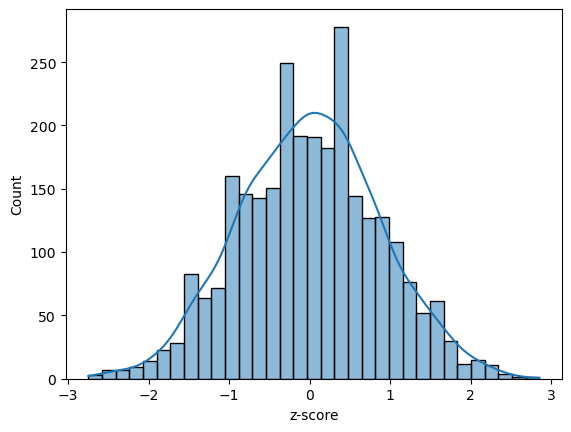

In [13]:
sns.histplot(df_no_outliers['z-score'], kde=True)